<a href="https://colab.research.google.com/github/vanshika72/LSTMTimeSeriesForecasting/blob/main/Vanshika_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data successfully read from MSFT.csv.
Null Values Before Cleaning:
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64
Data cleaned: 0 rows removed.
Data normalized for 'Close' column.
Head of the DataFrame:
         Date        Open        High         Low     Close   Adj Close  \
0  2023-05-30  335.230011  335.739990  330.519989  0.161091  328.639160   
1  2023-05-31  332.290009  335.940002  327.329987  0.137270  325.841064   
2  2023-06-01  325.929993  333.529999  324.720001  0.172664  329.998505   
3  2023-06-02  334.250000  337.500000  332.549988  0.196486  332.796631   
4  2023-06-05  335.220001  338.559998  334.660004  0.201047  333.332489   

     Volume  
0  29503100  
1  45950600  
2  26773900  
3  25864000  
4  21307100  

Description of the DataFrame:
             Open        High         Low       Close   Adj Close  \
count  252.000000  252.000000  252.000000  252.000000  252.000000   
mean   369.334285  372

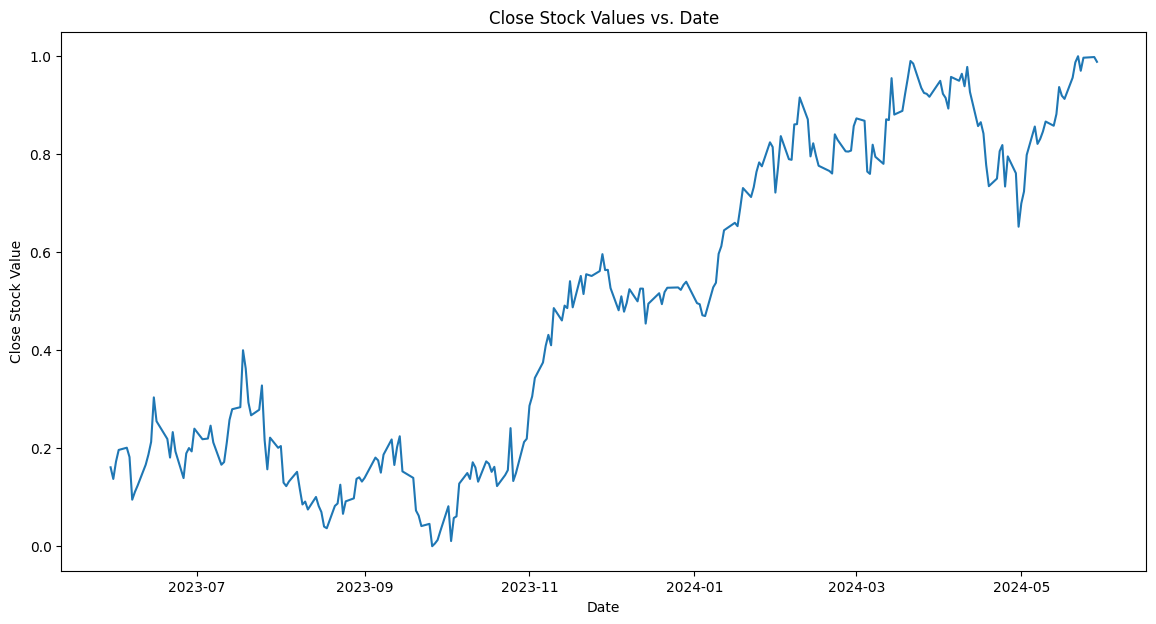

Epoch 1/50
6/6 - 6s - loss: 0.1349 - val_loss: 0.0250 - lr: 0.0010 - 6s/epoch - 977ms/step
Epoch 2/50
6/6 - 0s - loss: 0.0295 - val_loss: 0.0290 - lr: 0.0010 - 190ms/epoch - 32ms/step
Epoch 3/50
6/6 - 0s - loss: 0.0195 - val_loss: 0.0368 - lr: 0.0010 - 183ms/epoch - 30ms/step
Epoch 4/50
6/6 - 0s - loss: 0.0219 - val_loss: 0.0286 - lr: 0.0010 - 184ms/epoch - 31ms/step
Epoch 5/50
6/6 - 0s - loss: 0.0138 - val_loss: 0.0078 - lr: 0.0010 - 203ms/epoch - 34ms/step
Epoch 6/50
6/6 - 0s - loss: 0.0123 - val_loss: 0.0086 - lr: 0.0010 - 182ms/epoch - 30ms/step
Epoch 7/50
6/6 - 0s - loss: 0.0097 - val_loss: 0.0082 - lr: 0.0010 - 182ms/epoch - 30ms/step
Epoch 8/50
6/6 - 0s - loss: 0.0091 - val_loss: 0.0074 - lr: 0.0010 - 199ms/epoch - 33ms/step
Epoch 9/50
6/6 - 0s - loss: 0.0094 - val_loss: 0.0104 - lr: 0.0010 - 176ms/epoch - 29ms/step
Epoch 10/50
6/6 - 0s - loss: 0.0090 - val_loss: 0.0086 - lr: 0.0010 - 182ms/epoch - 30ms/step
Epoch 11/50
6/6 - 0s - loss: 0.0088 - val_loss: 0.0073 - lr: 0.0010 - 1

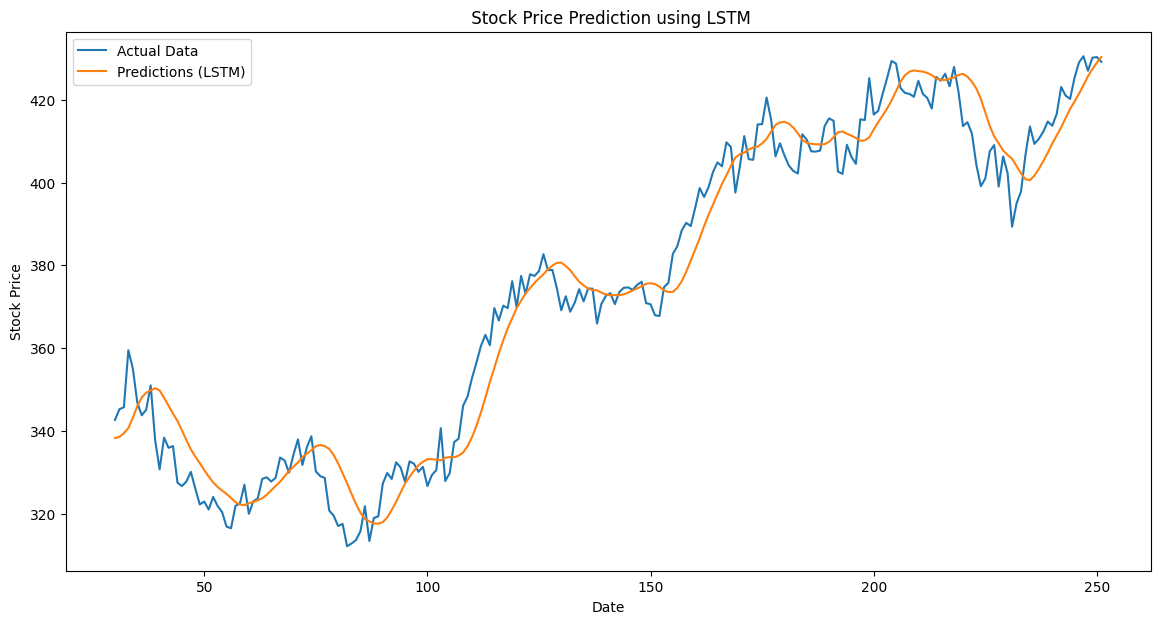

In [3]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau


class Data:
    def __init__(self):
        self.dataframe = pd.DataFrame([])

    def read(self, file_name: str):
        """Reads a CSV file into the dataframe."""
        if os.path.exists(file_name):
            self.dataframe = pd.read_csv(file_name)
            print(f"Data successfully read from {file_name}.")
        else:
            print(f"Error: The file {file_name} does not exist.")

    def check_null_values(self):
        """Checks for null values in the dataframe."""
        print("Null Values Before Cleaning:")
        print(self.dataframe.isnull().sum())

    def clean_data(self):
        """Removes null values from the dataframe."""
        initial_shape = self.dataframe.shape
        self.dataframe.dropna(inplace=True)
        final_shape = self.dataframe.shape
        print(f"Data cleaned: {initial_shape[0] - final_shape[0]} rows removed.")

    def normalize(self):
        """Normalizes the 'Close' column in the dataframe."""
        scaler = MinMaxScaler(feature_range=(0, 1))
        self.dataframe['Close'] = scaler.fit_transform(self.dataframe['Close'].values.reshape(-1, 1))
        print("Data normalized for 'Close' column.")
        return scaler

    def visualize(self, y_label):
        """Plots graph for stock values vs. date."""
        if 'Date' in self.dataframe.columns and y_label in self.dataframe.columns:
            self.dataframe['Date'] = pd.to_datetime(self.dataframe['Date'])
            plt.figure(figsize=(14, 7))
            sns.lineplot(data=self.dataframe, x='Date', y=y_label)
            plt.title(f'{y_label} Stock Values vs. Date')
            plt.xlabel('Date')
            plt.ylabel(f'{y_label} Stock Value')
            plt.show()
        else:
            print(f"Dataframe does not contain 'Date' and '{y_label}' columns.")

    def print_head(self):
        """Prints the head of the dataframe."""
        print("Head of the DataFrame:")
        print(self.dataframe.head())

    def print_description(self):
        """Prints the description of the dataframe."""
        print("\nDescription of the DataFrame:")
        print(self.dataframe.describe())


def prepare_data(data, look_back):
    X, y = [], []
    for i in range(len(data) - look_back):
        X.append(data[i:(i + look_back), 0])
        y.append(data[i + look_back, 0])
    return np.array(X), np.array(y)


# Instantiate the Data class and process the data
data_processor = Data()
csv_file_path = 'MSFT.csv'  # Replace with the path to your CSV file
data_processor.read(csv_file_path)
data_processor.check_null_values()
data_processor.clean_data()
scaler = data_processor.normalize()
data_processor.print_head()
data_processor.print_description()
data_processor.visualize('Close')

# Use the closing price for modeling
data = data_processor.dataframe['Close'].values.reshape(-1, 1)

# Prepare data for LSTM
look_back = 30
X, y = prepare_data(data, look_back)

# Reshape input to be [samples, time steps, features]
X = X.reshape(X.shape[0], X.shape[1], 1)

# Split the data into training and validation sets
split = int(0.8 * len(X))
X_train, X_val = X[:split], X[split:]
y_train, y_val = y[:split], y[split:]

# Build LSTM model
model_lstm = Sequential([
    LSTM(50, input_shape=(look_back, 1), return_sequences=True),
    Dropout(0.2),
    LSTM(50, return_sequences=False),
    Dropout(0.2),
    Dense(1)
])

model_lstm.compile(optimizer='adam', loss='mean_squared_error')

# Callbacks for early stopping and reducing learning rate
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-5)

# Train the LSTM model
history = model_lstm.fit(X_train, y_train, epochs=50, batch_size=32,
                         validation_data=(X_val, y_val), callbacks=[early_stopping, reduce_lr], verbose=2)

# Make predictions using LSTM model
train_predictions_lstm = model_lstm.predict(X)
train_predictions_lstm = scaler.inverse_transform(train_predictions_lstm)
y = scaler.inverse_transform(y.reshape(-1, 1))



# Custom accuracy calculation
def calculate_accuracy(y_true, y_pred, threshold=0.05):
    return np.mean(np.abs(y_true - y_pred) / y_true < threshold) * 100

accuracy = calculate_accuracy(y, train_predictions_lstm)

# Print accuracy metrics
print(f"Prediction Accuracy: {accuracy:.2f}%")

# Plot the results for LSTM
plt.figure(figsize=(14, 7))
plt.plot(data_processor.dataframe.index[look_back:], y, label='Actual Data')
plt.plot(data_processor.dataframe.index[look_back:], train_predictions_lstm, label='Predictions (LSTM)')
plt.title(' Stock Price Prediction using LSTM')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()
